## Team members: Shriya Nandimandalam and Elu Gebre -- Group 8
## Purpose: ITCS 3162 Summer 2024 Project -- To build a classification model to accurately predict the performance of a student.
## Date: 08/04/24



# 1. Import Packages:

In [45]:
!pip install scikit-learn
!pip install pycaret
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from pycaret.classification import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Read Inputs

In [46]:
#reading the csv file we were given from kaggle that is uploaded to google collab
#.head() method to display the first few lines to make sure its reading the file
student_data = pd.read_csv("/Users/shriyanandimandalam/Downloads/Summer 2024/ITCS 3162/Final Project/Student_performance_data _.csv")
print(student_data)

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracur

# 3.Data Pre-processing
Some recommended data pre processing steps for the student_performance dataset:
1. Check for missing values and replace them if any.
2. Check for rows (features) which have values that vary significantly in range compared to other features. Example - Age, Normalise/Standardise them. You can make use of StandardScaler().
3. You might also want to handle outliers if there are any.
4. Divide data into train and test sets.

In [47]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [48]:
student_data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [49]:
student_data_shape = student_data.shape
print(student_data_shape)

(2392, 15)


In [50]:
# Check for missing values and there are none
missing_values = student_data.isnull().sum()
print(missing_values)

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [51]:
#there are also no duplicates within the file
duplicates = student_data.duplicated().sum()
print(duplicates)

0


In [52]:
student_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [53]:
#Split the dataset into training and validation sets
X = student_data.drop('GradeClass', axis=1)
y = student_data['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Data Visualisation.

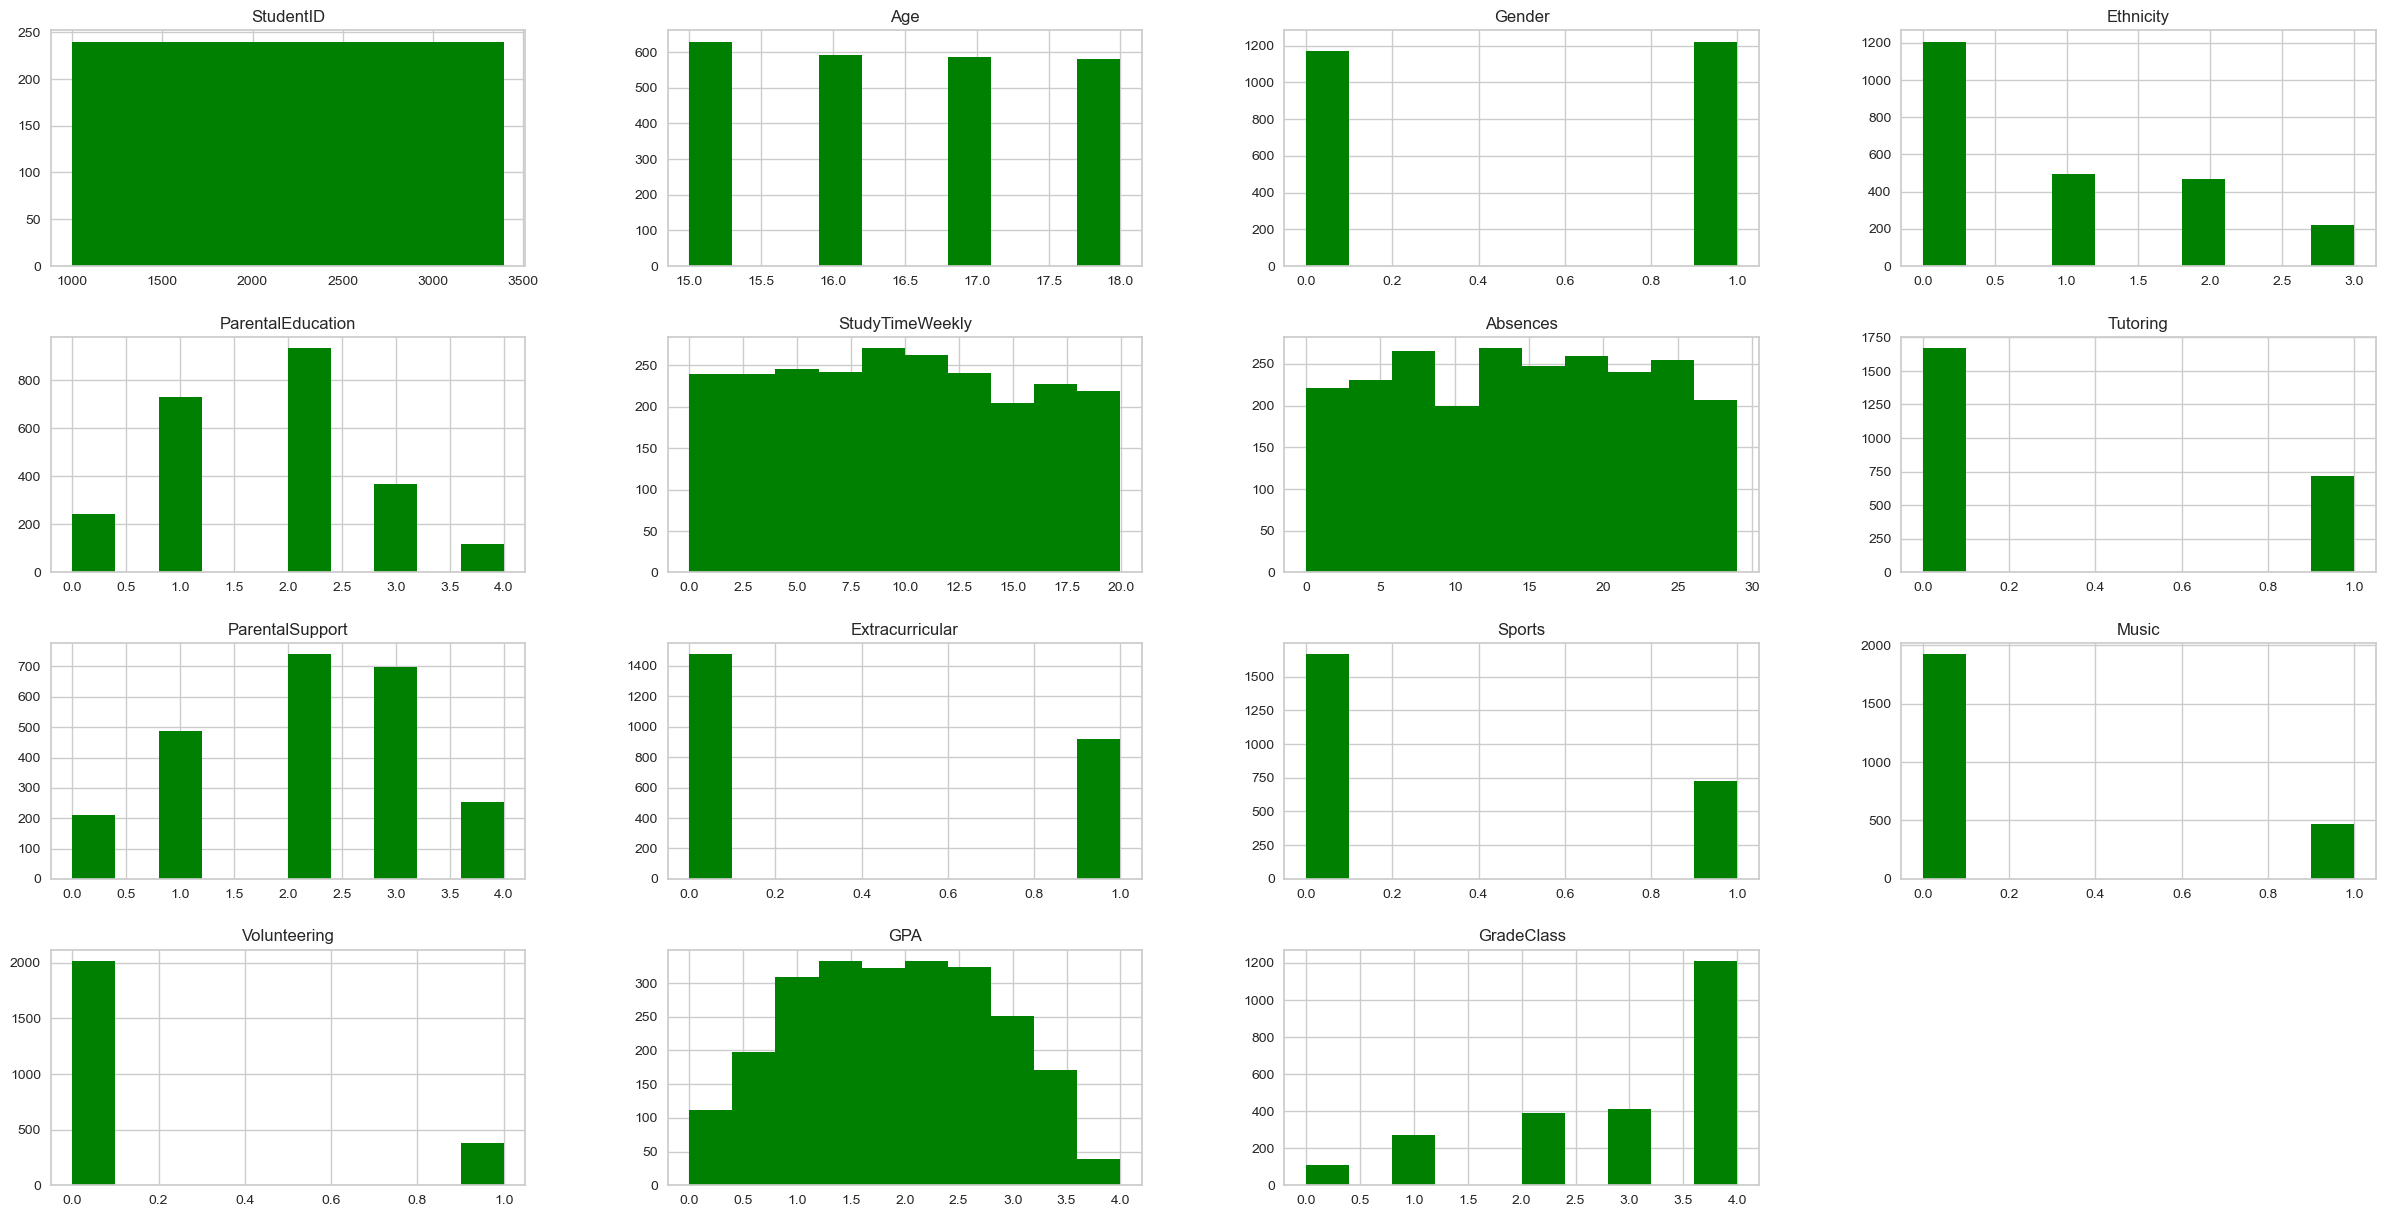

In [54]:
# Histogram
student_data.hist(figsize=(30,15), color = "green")
plt.show()

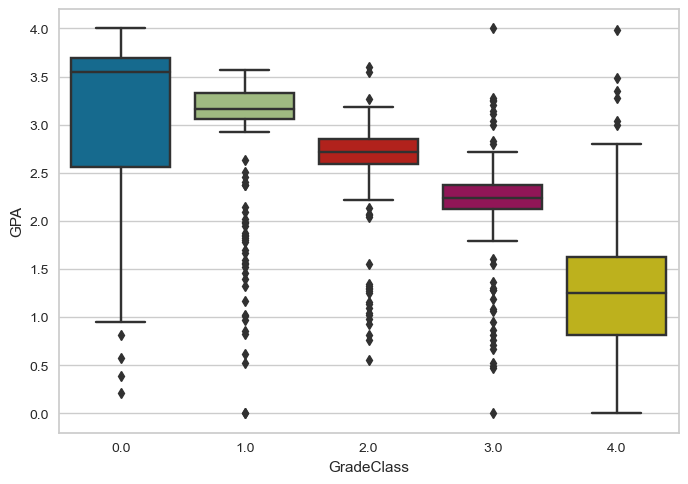

In [55]:
# Assuming 'GradeClass' is categorical and 'GPA' is numerical
sns.boxplot(x='GradeClass', y='GPA', data=student_data)
plt.show()

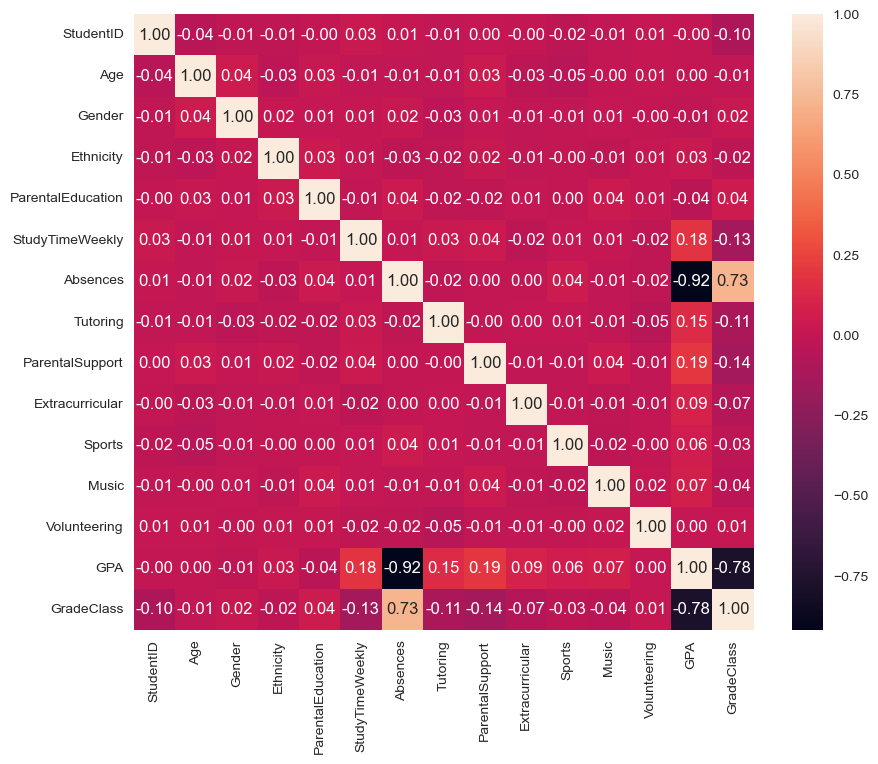

In [56]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(student_data.corr(), annot=True, fmt=".2f")
plt.show()

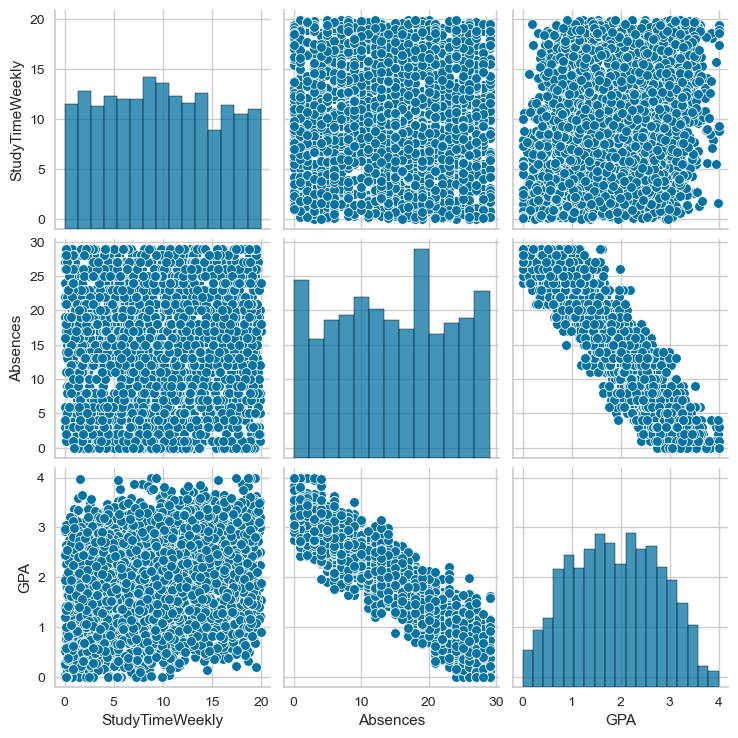

In [57]:
# Pairplot for selected features
sns.pairplot(student_data, vars=['StudyTimeWeekly', 'Absences', 'GPA'])
plt.show()

# 5. Feature Engineering and Selection
1. Create new features based on the existing ones, which might help you
with building the model and improve it's metrics like accuracy.
2. Out of all the available features, select the ones with the highest feature importance. Here is a reference for understanding feature importance and feature selection better - [link text](https://builtin.com/data-science/feature-importance#:~:text=Feature%20importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable). You can use Random Forest Classifer to calculate feature importances.

In [58]:
#Creating new feature by combining "parentalsupport" and "parentaleducation".
student_data['ParentalImpact'] = student_data['ParentalSupport'] + student_data['ParentalEducation']

In [59]:
#Creating new feature by combining "Extracurricular", "Sports", "Music", and "Volunteering"
student_data['TotalActivities'] = student_data[['Extracurricular', 'Sports', 'Music', 'Volunteering']].sum(axis=1)

In [60]:
#sectoring out the "StudyTimeWeekly" column for better modeling
bins = [0, 5, 10, 15, 20]
labels = ['Very Low', 'Low', 'Medium', 'High']

# Convert 'StudyTimeWeekly' to numeric, handling non-numeric values
student_data['StudyTimeWeekly'] = pd.to_numeric(student_data['StudyTimeWeekly'], errors='coerce')

student_data['StudyTimeWeekly'] =pd.cut(student_data['StudyTimeWeekly'], bins=bins, labels=labels)

student_data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,ParentalImpact,TotalActivities
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696,3.868311,1.040970
std,690.655244,1.123798,0.499986,1.028476,1.000411,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908,1.490738,0.849628
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000,3.000000,0.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000,4.000000,1.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000,5.000000,2.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,8.000000,4.000000


In [61]:
from sklearn.ensemble import RandomForestClassifier

# Preparing data for feature selection
X = student_data.drop(columns= ['StudentID', 'GradeClass', 'Age'])
y = student_data['GradeClass']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Filling any remaining NaN values that might have resulted from feature engineering
X.fillna(0, inplace=True)

# Using RandomForestClassifier to estimate feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Getting feature importances and sorting them
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Displaying the feature importances
important_features = [(X.columns[i], importances [i]) for i in indices]
display(important_features)

[('GPA', 0.5596558037857129),
 ('Absences', 0.2158839896229225),
 ('ParentalImpact', 0.028993391852282627),
 ('ParentalSupport', 0.027928745765877616),
 ('Ethnicity', 0.02497826457375468),
 ('ParentalEducation', 0.022865879309198464),
 ('TotalActivities', 0.019615775516351908),
 ('Gender', 0.013550186432854074),
 ('Tutoring', 0.01336094804531768),
 ('Sports', 0.011439314120747408),
 ('Extracurricular', 0.010982667313073565),
 ('StudyTimeWeekly_Very Low', 0.00884550017314794),
 ('StudyTimeWeekly_High', 0.00871011601583694),
 ('StudyTimeWeekly_Medium', 0.008426036642506343),
 ('Music', 0.00835756666747689),
 ('StudyTimeWeekly_Low', 0.008336703322370846),
 ('Volunteering', 0.008069110840567622)]

# 6. Model Building
1. Build and train at least 3 ML models for Classification using the most important features derived from the last step and evaluate their performance using various evaluation metrics like accuracy and precision -
2. Follow this video for any additional help [link text](https://www.youtube.com/watch?v=XmSlFPDjKdc).
3. We strongly recommend you use PyCaret as it reduces the requered code drastically. Here is their website [link text](https://pycaret.gitbook.io/docs) and a YT video [link text](https://www.youtube.com/watch?v=sL-4rWuEiVw).

In [62]:
from pycaret.classification import *

# Initialize the PyCaret environment
selected_features = ['GPA', 'Absences', 'ParentalImpact', 'Ethnicity', 'GradeClass']
student_data_PyCaret = student_data[selected_features]
clf1 = setup (data=student_data_PyCaret, target='GradeClass', session_id=42, normalize= True)

# Compare models and select the top 3
top3_models = compare_models(n_select=3)

# Evaluate the top model
best_model = top3_models[0]
evaluate_model(best_model)

# Tune the best model -- part for part 7
tuned_best_model = tune_model(best_model)

# Final evaluation of the tuned model
final_model = finalize_model(tuned_best_model)

# Save the final model
save_model(final_model, 'final_model')

,Description,Value
0,Session id,42
1,Target,GradeClass
2,Target type,Multiclass
3,Original data shape,"(2392, 5)"
4,Transformed data shape,"(2392, 5)"
5,Transformed train set shape,"(1674, 5)"
6,Transformed test set shape,"(718, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9212,0.9411,0.9212,0.9228,0.9191,0.8806,0.8820,0.0330
gbc,Gradient Boosting Classifier,0.9211,0.0000,0.9211,0.9225,0.9190,0.8807,0.8821,0.1150
lightgbm,Light Gradient Boosting Machine,0.9003,0.9409,0.9003,0.9012,0.8984,0.8496,0.8507,5.0990
et,Extra Trees Classifier,0.8889,0.9396,0.8889,0.8892,0.8869,0.8328,0.8338,0.0280
ada,Ada Boost Classifier,0.8751,0.0000,0.8751,0.8566,0.8595,0.8128,0.8173,0.0150
dt,Decision Tree Classifier,0.8614,0.9008,0.8614,0.8636,0.8607,0.7941,0.7949,0.0040
qda,Quadratic Discriminant Analysis,0.8244,0.0000,0.8244,0.8191,0.8114,0.7347,0.7369,0.0040
lr,Logistic Regression,0.8238,0.0000,0.8238,0.8044,0.8045,0.7289,0.7340,0.0140
knn,K Neighbors Classifier,0.8124,0.9219,0.8124,0.8099,0.8042,0.7165,0.7186,0.0070
lda,Linear Discriminant Analysis,0.7975,0.0000,0.7975,0.7780,0.7796,0.6914,0.6950,0.0040


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9345,0.9452,0.9345,0.9350,0.9326,0.9006,0.9021
1,0.9405,0.9484,0.9405,0.9414,0.9397,0.9103,0.9109
2,0.9167,0.9338,0.9167,0.9199,0.9154,0.8739,0.8752
3,0.9226,0.9343,0.9226,0.9267,0.9187,0.8820,0.8844
4,0.9401,0.9508,0.9401,0.9408,0.9402,0.9101,0.9103
5,0.9042,0.9194,0.9042,0.9055,0.9006,0.8520,0.8558
6,0.8982,0.9192,0.8982,0.8972,0.8948,0.8447,0.8464
7,0.9281,0.9485,0.9281,0.9304,0.9257,0.8910,0.8925
8,0.9521,0.9660,0.9521,0.9547,0.9501,0.9286,0.9292


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['GPA', 'Absences',
                                              'ParentalImpact', 'Ethnicity'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, inclu...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, cr

In [63]:
from pycaret.classification import pull
results = pull()
print(results)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9345  0.9452  0.9345  0.9350  0.9326  0.9006  0.9021
1       0.9405  0.9484  0.9405  0.9414  0.9397  0.9103  0.9109
2       0.9167  0.9338  0.9167  0.9199  0.9154  0.8739  0.8752
3       0.9226  0.9343  0.9226  0.9267  0.9187  0.8820  0.8844
4       0.9401  0.9508  0.9401  0.9408  0.9402  0.9101  0.9103
5       0.9042  0.9194  0.9042  0.9055  0.9006  0.8520  0.8558
6       0.8982  0.9192  0.8982  0.8972  0.8948  0.8447  0.8464
7       0.9281  0.9485  0.9281  0.9304  0.9257  0.8910  0.8925
8       0.9521  0.9660  0.9521  0.9547  0.9501  0.9286  0.9292
9       0.9401  0.9441  0.9401  0.9418  0.9392  0.9103  0.9110
Mean    0.9277  0.9410  0.9277  0.9293  0.9257  0.8903  0.8918
Std     0.0164  0.0138  0.0164  0.0167  0.0172  0.0258  0.0250


# 7. Hyperparameter Tuning
1. Hyperparameter tuning is one of the most important steps in the ML model pipeline. Here is a reference video if you need additional help - [link text](https://www.youtube.com/watch?v=sL-4rWuEiVw).
2. Select the model with the best performance from the previous step.
3. After evaluating the model's performance in the previous step, you can try evaluating the model again after Hyperparameter Tuning and you will witness a spike in it's performance.
4. You can make use of PyCaret here again, to simplify the task!

  **Did the code for Hyperparameter tuning in the previous step.**

# 8. Model Evaluation and Prediction
1. Evaluate the tuned model's performance on the test or validation set and make a prediction with a hold out set of data.

In [64]:
print("Tuned Model Performance on Validation Set:")
print(f"Accuracy: {results['Accuracy']['Mean']:.4f}")
print(f"Precision: {results['Prec.']['Mean']:.4f}")
print(f"Recall: {results['Recall']['Mean']:.4f}")
print(f"F1 Score: {results['F1']['Mean']:.4f}")

Tuned Model Performance on Validation Set:
Accuracy: 0.9277
Precision: 0.9293
Recall: 0.9277
F1 Score: 0.9257
